# SI 618: Data Manipulation and Analysis
### Categorical Data: Pivoting, contingency tables, crosstabs, mosaic plots and chi-squared

Some content from Dr. Chris Teplovs, School of Information, University of Michigan

## Before we start our examination of categorical data...
## Let's revisit MTurk


You read an article by Mary Gray for Lab7 and then worked with MTurk yourself in HW7. What are your reflections after that active engagement?

# Categorical Data

## Contingency tables, crosstabs, and chi-square

So far, we have been focusing mostly on continuous variables. What if we're interested in relationships between categorical variables?

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

Let's generate a data frame to play with:

In [2]:
df = pd.DataFrame({'color' : ['red', 'green', 'green', 'black'] * 6,
                   'make' : ['ford', 'toyota', 'dodge'] * 8,
                   'vehicleClass' : ['suv', 'suv', 'suv', 'car', 'car', 'truck'] * 4})

In [3]:
df.head()

,color,make,vehicleClass
0,red,ford,suv
1,green,toyota,suv
2,green,dodge,suv
3,black,ford,car
4,red,toyota,car


One of the most basic transformations we can do is a crosstab:

In [4]:
ct = pd.crosstab(df.color,df.vehicleClass)
ct

vehicleClass,car,suv,truck
color,,,
black,2,2,2
green,4,6,2
red,2,4,0


Notice how similar it is to pivoting.  In fact, go ahead and use ```pivot_table``` to do the same sort of transformation:

### <font color="magenta">Class Exercise: Use ```pivot_table``` to create a DataFrame similar to the one from the ```crosstab``` above:

In [5]:
###FILL OUT

As usual, we would like to visualize our results:

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='vehicleClass', ylabel='color'>

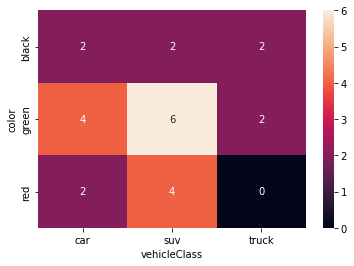

In [7]:
sns.heatmap(ct,annot=True)

### Titanic data

One of the more popular datasets that we use for experimenting with crosstabs is the 
survivor data from the Titanic disaster:

In [8]:
titanic = pd.read_csv('data/titanic.csv')

In [9]:
titanic.head()

,passtype,age,status,sex
0,third,child,dead,male
1,third,child,dead,male
2,third,child,dead,male
3,third,child,dead,male
4,third,child,dead,male


Let's create a crosstab of the data:

In [10]:
ct = pd.crosstab(titanic.passtype,titanic.status,margins=True)
ct

status,alive,dead,All
passtype,,,
crew,212,673,885
first,203,122,325
second,118,167,285
third,178,528,706
All,711,1490,2201


Now let's use our knowledge of data manipulation with pandas to generate some percentages totals:

### <font color="magenta">Class Exercise: Generate this:</font>

![](assets/samplect.png)

In [13]:
# FILL OUT
detailCT = ct.copy()
aliveperc = ##
deadperc = ##
totalperc = ##

detailCT.alive = detailCT.alive.astype('str') + " (" + aliveperc.astype('str') + "%)"
detailCT.dead = detailCT.dead.astype('str') + " (" + deadperc.astype('str') + "%)"
detailCT.All = detailCT.All.astype('str') + " (" + totalperc.astype('str') + "%)"

## Is this what we would have expected?
Let's generate a table corresponding to the expected values so we can compare. Our goal is to determine which groups are killed at a higher rate than what you would expect.

In [14]:
# Let's fill in the correct numbers on the next two lines (where np.NaN is right now)
# What numbers should I use?
expectedAlive = np.round(ct.All * 0.323, decimals=3) 
expectedDead = np.round(ct.All * 0.677, decimals=3) 
expectedAlive

passtype
crew      285.855
first     104.975
second     92.055
third     228.038
All       710.923
Name: All, dtype: float64

### Now generate a similar matrix for the *expected* (as oppposed to observed) values:

In [15]:
ctExpected = ct.copy()
ctExpected.alive = expectedAlive
ctExpected.dead = expectedDead
ctExpected['All'] = 0
ctExpected.loc['All'] = 0
ctExpected['All'] = ctExpected.sum(axis=1)
ctExpected.loc['All'] = ctExpected.sum(axis=0)
alivePercent = np.round(ctExpected.alive/ctExpected.All * 100,decimals=2)
deadPercent = np.round(ctExpected.dead/ctExpected.All * 100,decimals=2)
totalPercent = np.round(ctExpected.All/ctExpected.All * 100,decimals=2)
detailExp = ctExpected.copy()
detailExp.alive = ctExpected.alive.astype('str') + " (" + alivePercent.astype('str') + "%)"
detailExp.dead = ctExpected.dead.astype('str') + " (" + deadPercent.astype('str') + "%)"
detailExp.All = ctExpected.All.astype('str') + " (" + totalPercent.astype('str') + "%)"

In [16]:
detailExp

status,alive,dead,All
passtype,,,
crew,285.855 (32.3%),599.145 (67.7%),885.0 (100.0%)
first,104.975 (32.3%),220.025 (67.7%),325.0 (100.0%)
second,92.055 (32.3%),192.945 (67.7%),285.0 (100.0%)
third,228.038 (32.3%),477.962 (67.7%),706.0 (100.0%)
All,710.923 (32.3%),1490.077 (67.7%),2201.0 (100.0%)


In [17]:
detailCT

status,alive,dead,All
passtype,,,
crew,212 (23.95%),673 (76.05%),885 (100.0%)
first,203 (62.46%),122 (37.54%),325 (100.0%)
second,118 (41.4%),167 (58.6%),285 (100.0%)
third,178 (25.21%),528 (74.79%),706 (100.0%)
All,711 (32.3%),1490 (67.7%),2201 (100.0%)


So, there we have the expected and observed values, along with their proportions. What do you observe? Which groups have a worse-off outcome than expected?

In addition to the heatmap shown above, we can use a mosaic plot to visualize 
contingency tables:

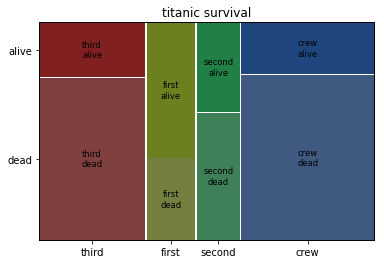

In [18]:
from statsmodels.graphics.mosaicplot import mosaic
t = mosaic(titanic, ['passtype','status'],title='titanic survival')

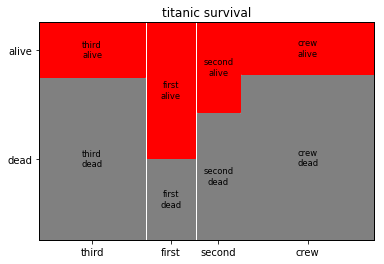

In [19]:
# slightly easier to read
props = lambda key: {'color': 'r' if 'alive' in key else 'gray'}
t = mosaic(titanic, ['passtype','status'],title='titanic survival',properties=props)

### <font color="magenta"> Now, let's create the same plot for sex groups. This time, i want to have the survuval status as columns (as opposed to rows). What do we  need to change below?</font>

In [20]:
#FILL OUT

Finally, we can go beyond visual exploration and apply analytic tests to see if the 
observed values differ from the expected ones.  The chi-square test sums the squares of the differences
between the observed and expected values, normalized for the expected values.

## Let's talk about $\chi^2$

We can use contingency tables and chi square to analyze text as well.

<img src="resources/chisq1.png" alt="Drawing" style="width: 500px;"/>

Ok but is the assosiation a strong/significant one?

<img src="resources/chisq2.png" alt="Drawing" style="width: 500px;"/>

Let's look at a historical example

<img src="resources/chisq3.png" alt="Drawing" style="width: 500px;"/>

In [21]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

chi2 =  190.40110361683327
p-val =  6.705773035354302e-37
degree of freedom =  8
Expected:


,0,1,2
0,285.885961,599.114039,885.0
1,104.986370,220.013630,325.0
2,92.064970,192.935030,285.0
3,228.062699,477.937301,706.0
4,711.000000,1490.000000,2201.0


In [22]:
ct

status,alive,dead,All
passtype,,,
crew,212,673,885
first,203,122,325
second,118,167,285
third,178,528,706
All,711,1490,2201


## Let's apply these ideas to another dataset

For this component, we'll use the Comic Characters data set:

In [23]:
comic_characters = pd.read_csv("data/comic_characters.csv", index_col="id")
comic_characters.head(1)

,publisher,name,Identity,align,eye,hair,sex,alive,appearances,first_appearance,month,year,date
id,,,,,,,,,,,,,
1,Marvel,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,"1962, August",August,1962.0,8/1/1962


### Example

We'd like to know which publisher uses different 'identity' types for their characters? Have DC characters appeared more publicly? What is the total number of times Marvel Characters appeared known to authorities identity?

In [24]:
comic_characters.groupby(['Identity','publisher'])['appearances'].sum().unstack().fillna(0)

publisher,DC,Marvel
Identity,,
Identity Unknown,27.0,0.0
Known to Authorities Identity,0.0,1116.0
No Dual Identity,0.0,41215.0
Public Identity,66786.0,100208.0
Secret Identity,74715.0,102871.0


Alternatively, we can use .pivot_table(). For example:

In [25]:
avg_appearance_per_identity = comic_characters.pivot_table(index='publisher', 
                                                          columns='Identity', 
                                                          values='appearances',
                                                          aggfunc='sum')
avg_appearance_per_identity = avg_appearance_per_identity.fillna(0)
avg_appearance_per_identity

Identity,Identity Unknown,Known to Authorities Identity,No Dual Identity,Public Identity,Secret Identity
publisher,,,,,
DC,27.0,0.0,0.0,66786.0,74715.0
Marvel,0.0,1116.0,41215.0,100208.0,102871.0


For .pivot_table(), you need to specify these four arguments:
1. index: the field that will become the index of the output table
2. columns: the field that will become the columns of the output table
3. values: the field to be aggregated/summarized
4. aggfunc: the aggregation operator applied to values, if there are more than 1 entry corresponding to each (index, column) pair, such as "mean", "count", "max"
    

In [26]:
chi2, p, dof, ex = chi2_contingency(avg_appearance_per_identity)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

chi2 =  27611.922208761578
p-val =  0.0
degree of freedom =  4
Expected:


,0,1,2,3,4
0,9.875629,408.192651,15074.964258,61080.397459,64954.570003
1,17.124371,707.807349,26140.035742,105913.602541,112631.429997


Let's remember the observed data

In [27]:
avg_appearance_per_identity

Identity,Identity Unknown,Known to Authorities Identity,No Dual Identity,Public Identity,Secret Identity
publisher,,,,,
DC,27.0,0.0,0.0,66786.0,74715.0
Marvel,0.0,1116.0,41215.0,100208.0,102871.0


## Let's create a mosaic plot that characterizes the number of characters of different identity types across publishers
There are too many types. We can ccombine all types other than Secret and Public as an other category.

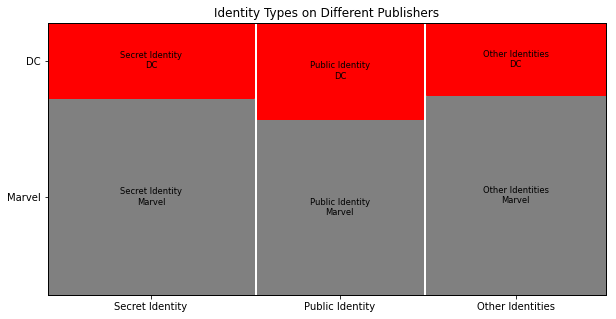

In [28]:
comic_characters_cp = comic_characters.copy()
comic_characters_cp.loc[(comic_characters_cp['Identity'] != 'Secret Identity') & (comic_characters_cp['Identity'] != 'Public Identity'), 'Identity'] = "Other Identities"
props = lambda key: {'color': 'r' if 'DC' in key else 'gray'}
t = mosaic(comic_characters_cp, ['Identity','publisher'],title='Identity Types on Different Publishers',properties=props)
t[0].set_size_inches(10, 5)

# Exercises for later. Practice, practice, practice! Best way to learn

### <font color="magenta">Q1: What is the total number of appearances of characters for each publisher?

In [62]:
# Add your code here

### <font color="magenta">Q2: What is the total number of appearances of characters by each publisher in each year? Output a table.

In [ ]:
# Add your code here

### <font color="magenta">Q3: Construct a contingency table of sex and character alignment normalized by all values.

Display the normalized values in percentage (%) format. Use brief sentences to explain your findings.  

Hint: use "normalize=all" in your crosstab statement.  What does normalize do? (read the docs)

In [ ]:
# Add your code here

### <font color="magenta">Q4: Create a mosaic plot of character alignment and alive status.

In [ ]:
# Add your code here

### <font color="magenta">Q5: Conduct a $\chi^2$ test of ```align``` and ```alive```. Please specify your (null and alternative) hypotheses and explain your findings.

In [ ]:
# Add your code here

## Youtube Behavioral Data
* [https://www.kaggle.com/datasnaek/youtube-new](https://www.kaggle.com/datasnaek/youtube-new)

> YouTube provides a list of trending videos on it's site, determined by user interaction metrics such as likes, comments, and views. This dataset includes months of daily trending video across five different regions: the United States ("US"), Canada ("CA"), Great Britain ("GB"), Germany ("DE"), and France ("FR").

Let's first inspect that data at a high level, starting with the U.S. focused dataset

In [29]:
youtube_us = pd.read_csv('data/youtube-new/USvideos.csv')
youtube_us['country'] = "US"

In [30]:
youtube_us.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


Describe only summarizes numerical data. What else is in here?

In [63]:
youtube_us.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US


Let's see the distribution of number of comments:

<AxesSubplot:xlabel='comment_count', ylabel='Count'>

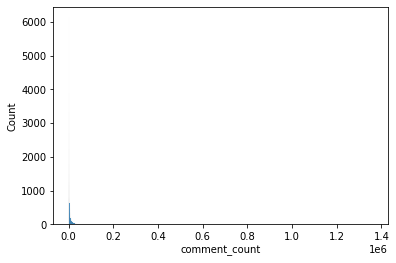

In [41]:
sns.histplot(youtube_us['comment_count'])

It is pretty hard to see, right? Why do you think that is the case? And how can we make that more interpretable?

<AxesSubplot:xlabel='comment_count', ylabel='Count'>

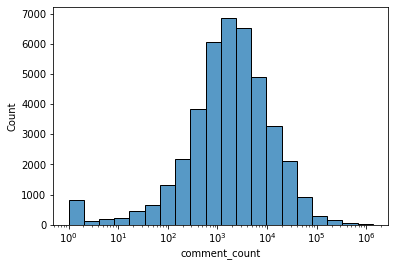

In [80]:
sns.histplot(youtube_us['comment_count']+1,bins=20,log_scale=True)

You can specify whether you want to use log scale for both axis. Let's see that.

<AxesSubplot:xlabel='comment_count', ylabel='Count'>

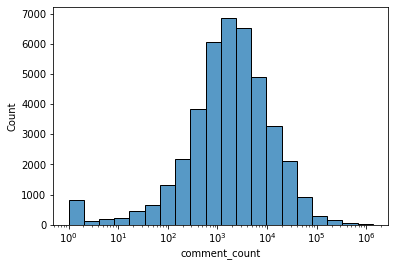

In [67]:
sns.histplot(youtube_us['comment_count']+1,bins=20,log_scale=(True,False))

Let's look at some other characteristics...

<AxesSubplot:xlabel='likes', ylabel='Count'>

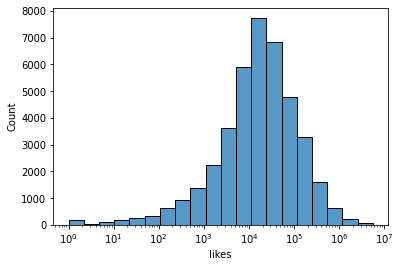

In [43]:
sns.histplot(youtube_us['likes']+1,bins=20,log_scale=True)

How does this compare to the plot for comments?

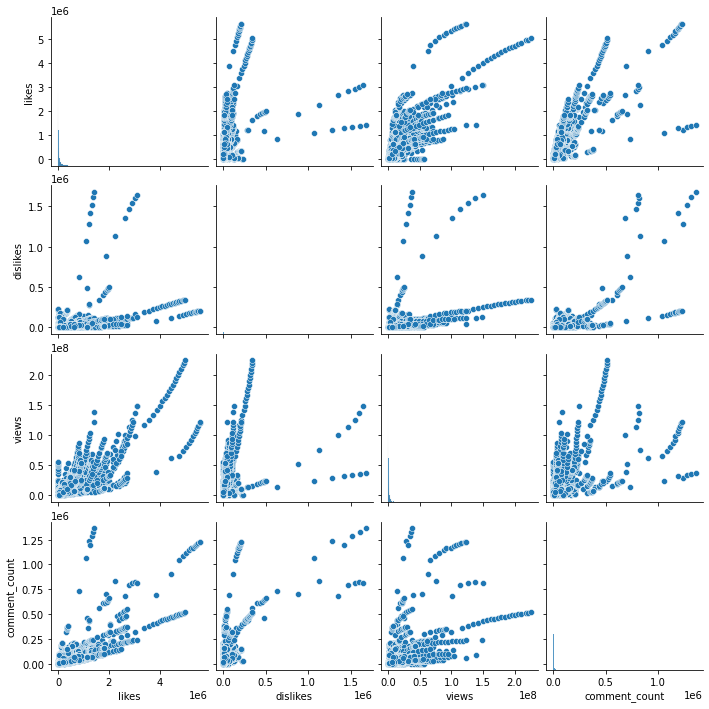

In [49]:
sns.pairplot(data=youtube_us, vars=['likes','dislikes','views','comment_count'])

### <font color="magenta">To do at home later: As is mostly thhe case with skewed data, scatter plot can hide a lot of important patterns due to the outliers. How would you create a pairplot to better interpret the data?

Now, lets create a heatmap of correlations between likes, dislikes, comment count and views

>A [heat map (or heatmap)](https://en.wikipedia.org/wiki/Heat_map) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

Seaborn makes it easy to create a heatmap with [`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* Create a correlation matrix for your numeric variables using Pandas with [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html). That is, if your dataframe is called `df`, use `df.corr()`.
* Pass in your correlation matrix to `seaborn.heatmap()`, and annotate it with the parameter `annot=True`.

(4.0, 0.0)

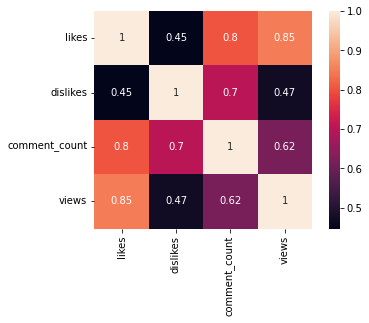

In [81]:
heat_map = youtube_us[['likes', 'dislikes', 'comment_count', 'views']]
corr = heat_map.corr()
ax = sns.heatmap(corr, annot=True, square = True)
ax.set_ylim(4.0, 0)

Which of these relationships did you expect and which are surprising? Why do you think we observe these patterns?

## Let's now look at other countries as well...

In [ ]:
youtube_gb = pd.read_csv('data/youtube-new/GBvideos.csv')
youtube_gb['country'] = "GB"
youtube_de = pd.read_csv('data/youtube-new/DEvideos.csv')
youtube_de['country'] = "DE"
youtube_fr = pd.read_csv('data/youtube-new/FRvideos.csv')
youtube_fr['country'] = "FR"
youtube_all = pd.concat([youtube_us, youtube_gb, youtube_de, youtube_fr])

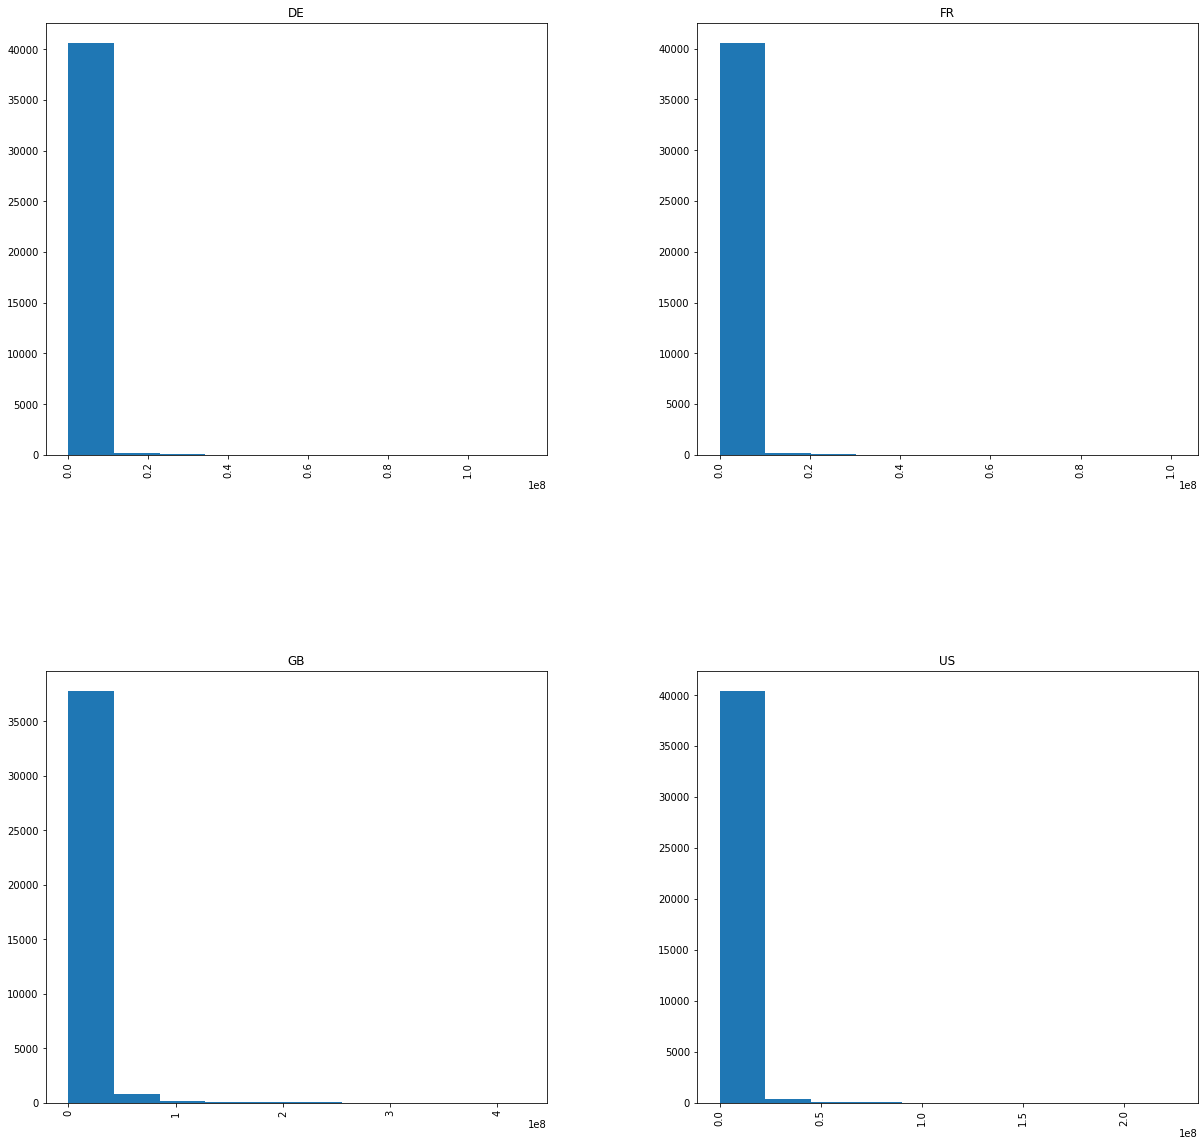

In [71]:
#you can alsoo use pandas functionality to construct a histogram 
import matplotlib.pyplot as plt
youtube_all['views'].hist(by=youtube_all['country'], figsize = [20,20], grid = True)
plt.show()

This is again hard to read. We might find it easier to read in log-scale. Here is one way to do it:

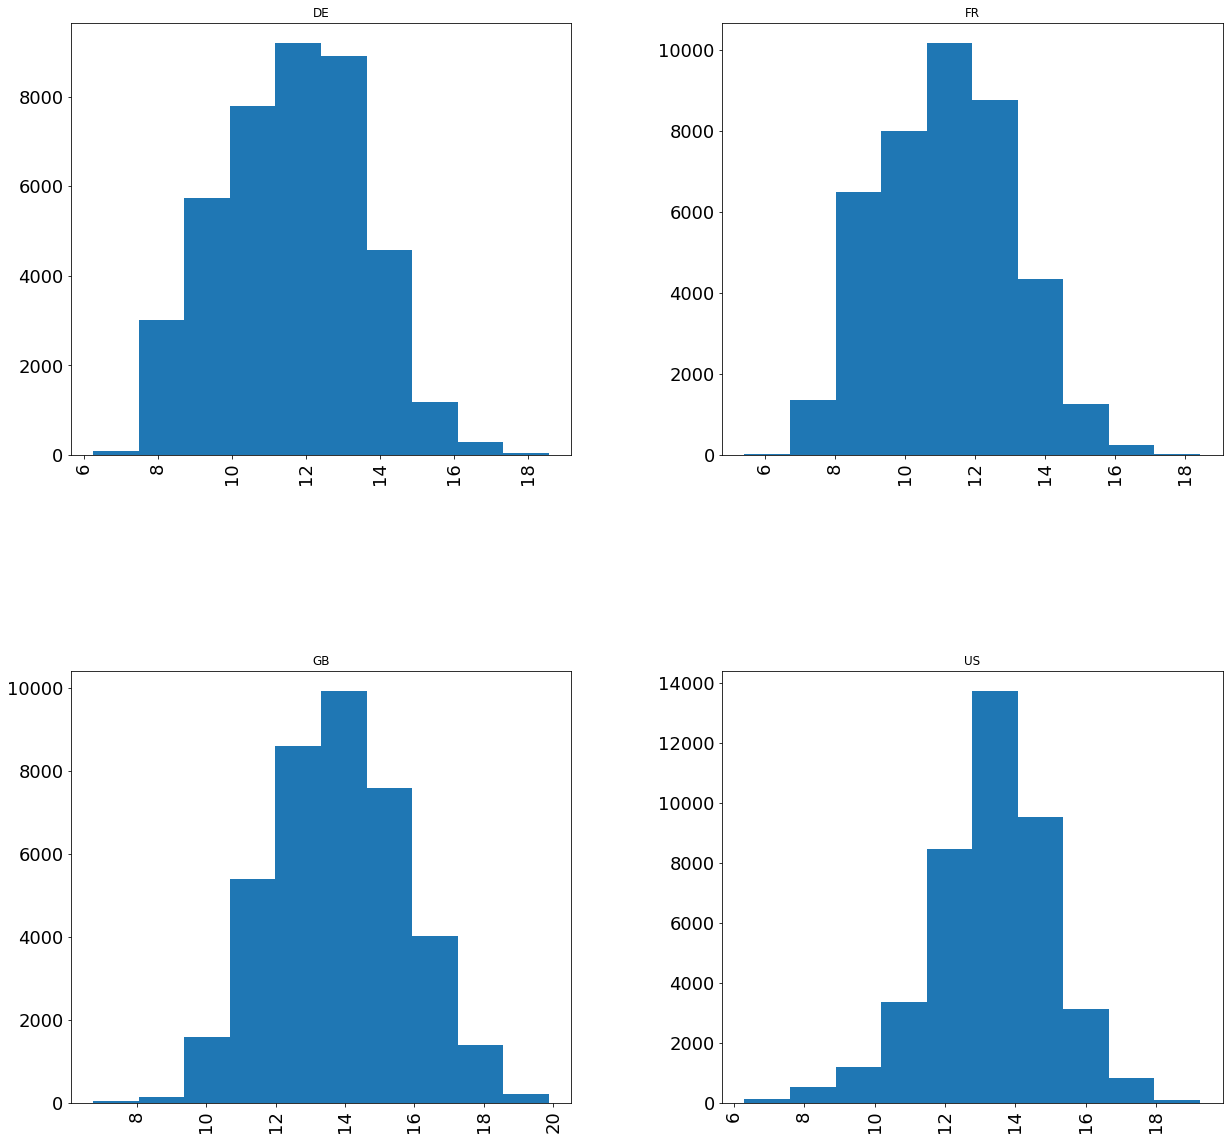

In [78]:
#another way to deal with log scale
import matplotlib.pyplot as plt
np.log(youtube_all['views']).hist(by=youtube_all['country'], figsize = [20,20], grid = True, xlabelsize=18, ylabelsize=18)
plt.show()

What do you see here?

In [ ]:
# Now lets look at categorical values

In [82]:
youtube_all.describe()

,category_id,views,likes,dislikes,comment_count
count,161429.000000,1.614290e+05,1.614290e+05,1.614290e+05,1.614290e+05
mean,19.438112,2.282657e+06,6.118882e+04,3.335684e+03,6.464970e+03
std,7.475017,1.038549e+07,2.226494e+05,3.054864e+04,3.348910e+04
min,1.000000,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,5.967800e+04,1.268000e+03,5.800000e+01,1.770000e+02
50%,23.000000,2.893980e+05,7.290000e+03,2.860000e+02,8.220000e+02
75%,24.000000,1.151252e+06,3.337800e+04,1.215000e+03,3.445000e+03
max,44.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


In [92]:
#Lets see how success categories can vary across countries
view_success_threshold = youtube_all['views'].quantile(.75)
youtube_all['successful_views'] = np.where(youtube_all['views'] > view_success_threshold, 'Successful', 'Not Successful')

ct = pd.crosstab(youtube_all.country, youtube_all.successful_views)
ct

successful_views,Not Successful,Successful
country,,
DE,36447,4393
FR,37726,2998
GB,20643,18273
US,26256,14693


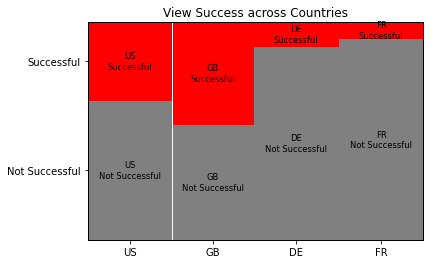

In [93]:
# We can also use mosaic to see this in visual form
props = lambda key: {'color': 'r' if 'Successful' in key else 'gray'}
t = mosaic(youtube_all, ['country','successful_views'],title='View Success across Countries',properties=props)

## Let's revisit visualization for data scientists


Remember the special virtual guest lecturer to provide some background on data visualization?  Together,you should have watched [a brief (8-video) by Dr. Chris Brooks](
https://www.coursera.org/learn/python-plotting/lecture/qrqqa/tools-for-thinking-about-design-alberto-cairo)
and afterwards answered the following questions in breakout rooms:


1. As someone who is studying data science, who are you trying to reach through your visualizations? 
2. Take a look at the different visualizations that are possible with seaborn (https://seaborn.pydata.org/examples/index.html)
3. Discuss the visualizations that you find particularly interesting and explain why you find it interesting. 
4. Provide the title, description, and URL of one of the visualization that the group finds most interesting.
5. Describe 2 axes from Cairo's wheel that your visualization would score highly.
![](resources/CairoVisualWheel.png)


Let's discuss your answers!